# Geostatistics and Reservoir Simulation

# Homework 2

# Alexey Topolnitskiy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
"""
Initializing starting conditions
"""

T_init = 377.6 # K
P_init = 32.4 # MPa
R = 0.0083144 # (MPa * m^3) / (K * kmol)
tolerance = 10e-12

zi = np.array([.6, .4])
Sample_init = pd.DataFrame(zi,
                      index = ['C1', 'nC10'],
                      columns = ['zi'])

Sample_init

,zi
C1,0.6
nC10,0.4


In [3]:
"""
Adding into the table required properties 
of all components (MW, Tc, Pc, wi)
from the PVT tables
"""

#Molar weight
Sample_init['MW'] = np.array([16.043, 142.285]) # kg / kmol
# Criical temperature
Sample_init['Tc'] = np.array([190.56, 617.7]) # K
# Critical presure
Sample_init['Pc'] = np.array([4.599, 2.11]) # MPa
# Acentric factor
Sample_init['w'] = np.array([0.0115, 0.4923]) 
# As it is a bubble pressure then x_i = z_i
Sample_init['x'] = Sample_init['zi']

Sample_init

,zi,MW,Tc,Pc,w,x
C1,0.6,16.043,190.56,4.599,0.0115,0.6
nC10,0.4,142.285,617.70,2.110,0.4923,0.4


In [4]:
"""
Interaction coefficients for PR EOR
"""

AA = [[0, 0, .135, .105, .130, .125, .120, .115, .115, .155, .115, .115, .115, .115, .115], 
      [0, 0, .130, .025, .010, .090, .095, .095, .100, .100, .110, .115, .150, .150, .125], 
      [0, 0, 0, .07, .085, .080, .075, .075, .070, .070, .070, .060, .060, .060, .055],
      [0, 0, 0, 0, .005, .010, .035, .025, .050, .030, .030, .035, .040, .040, .050], 
      [0, 0, 0, 0, 0, .005, .005, .010, .020, .020, .020, .020, .020, .020, .020], 
      [0, 0, 0, 0, 0, 0, 0, 0, .015, .015, .010, .005, .005, .005, .005], 
      [0, 0, 0, 0, 0, 0, 0, .005, .005, .005, .005, .005, .005, .005, .005], 
      [0, 0, 0, 0, 0, 0, 0, 0, .005, .005, .005, .005, .005, .005, .005]]

AA = np.array(AA)
BB = np.zeros([7, 15])
kij=np.concatenate((AA,BB), axis=0)

Kij = pd.DataFrame(kij, 
                   index = ['CO2', 'N2', 'H2S', 'C1', 'C2', 'C3', 'i-C4', 'n-C4', 'i-C5', 'n-C5', 'C6', 'C7', 'C8', 'C9', 'nC10'], 
                   columns = ['CO2', 'N2', 'H2S', 'C1', 'C2', 'C3', 'i-C4', 'n-C4', 'i-C5', 'n-C5', 'C6', 'C7', 'C8', 'C9', 'nC10'])

print('An interaction table')
Kij

An interaction table


,CO2,N2,H2S,C1,C2,C3,i-C4,n-C4,i-C5,n-C5,C6,C7,C8,C9,nC10
CO2,0.0,0.0,0.135,0.105,0.130,0.125,0.120,0.115,0.115,0.155,0.115,0.115,0.115,0.115,0.115
N2,0.0,0.0,0.130,0.025,0.010,0.090,0.095,0.095,0.100,0.100,0.110,0.115,0.150,0.150,0.125
H2S,0.0,0.0,0.000,0.070,0.085,0.080,0.075,0.075,0.070,0.070,0.070,0.060,0.060,0.060,0.055
C1,0.0,0.0,0.000,0.000,0.005,0.010,0.035,0.025,0.050,0.030,0.030,0.035,0.040,0.040,0.050
C2,0.0,0.0,0.000,0.000,0.000,0.005,0.005,0.010,0.020,0.020,0.020,0.020,0.020,0.020,0.020
C3,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.015,0.015,0.010,0.005,0.005,0.005,0.005
i-C4,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005
n-C4,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.005,0.005,0.005,0.005,0.005,0.005
i-C5,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
n-C5,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## Task 1. Calculate the bubble point pressure of the fluid through using PR EOS.

In [5]:
"""
PR EOS relevant parameters calculation
for each component (a, b, alpha)
"""

def PR_EOS_params(Sample, R, T):
    
    Sample['a'] = 0.45724 * R**2 * Sample['Tc']**2 / Sample['Pc']
    Sample['b'] = 0.0778 * R * Sample['Tc'] / Sample['Pc']
    Sample['m'] = 0.379642 + 1.48503 * Sample['w'] - 0.1644 * Sample['w']**2 + 0.016667 * Sample['w']**3
    Sample['alpha'] = (1 + Sample['m'] * (1. - (T / Sample['Tc'])**(1/2)))**2
    
    return Sample    

In [6]:
"""
Calculation of A, B coefficients
and Z-factors for each phase 
"""

def PR_EOS(Sample, Kij, P, T, R):
    
    # A matrix for A and B coefficients
    A_B = np.zeros((2, 2), dtype = 'single')
    A_B = pd.DataFrame(A_B,
                       index = ['x', 'y'],
                       columns = ['A', 'B'])
    
    # A list of components from the Sample
    components = list(Sample.index)
    
    # A loop through all phases
    for phase in ['x', 'y']:
        a_alpha_m = 0
        for i in components:
            for j in components:
                if i == j: 
                    k = 0 # The same components
                else:
                    if Kij[i][j] == 0:
                        k = Kij[j][i] # Due to the structure of the interaction table
                    else:
                        k = Kij[i][j] 
                
                a_alpha_m += Sample[phase][i]*Sample[phase][j] * (Sample['a'][i]*Sample['a'][j] *\
                                                                  Sample['alpha'][i]*Sample['alpha'][j])**(1/2) * (1 - k)
        
        b_m = sum(Sample[phase]*Sample['b'])
        
        A_B['A'][phase] = a_alpha_m * P / (R * T)**2
        A_B['B'][phase] = b_m * P / (R * T)
        
        # Coefficients for calculation a Z factor
        Z_coef = np.array([1,
                           A_B['B'][phase] - 1,
                           A_B['A'][phase] - 3*A_B['B'][phase]**2 - 2*A_B['B'][phase],
                           -(A_B['A'][phase]*A_B['B'][phase] - A_B['B'][phase]**2 - A_B['B'][phase]**3)])
        
        # Calculation of Z (roots of the equation above)
        Z_roots = np.roots(Z_coef)
        # Checking roots for being real
        Z_roots = Z_roots[np.isreal(Z_roots)]
        
        if phase == 'x':
            Z_L = np.min(np.real(Z_roots)) # Z factor for liquid phase
        else:
            Z_V = np.max(np.real(Z_roots)) # Z factor for vapour phase
    
    # A dataframe for Z factors
    Z = np.array([Z_L, Z_V])
    Z_factors = pd.DataFrame(Z,
                             index = ['x', 'y'],
                             columns = ['Z'])
    
    return A_B, Z_factors    

In [7]:
"""
Calculation of fugacity coefficients
"""

def fugacity_coefs_calc(Sample, Kij, Z_factors, A_B):
    
    # A list of components from the Sample
    components = np.array(Sample.index)
    
    # A dataframe with fugacity coefficients
    fug_coefs = pd.DataFrame(np.zeros((2, 2), dtype = 'single'),
                             index = components,
                             columns = ['x', 'y'])
    
    # A dictionary which will contain values of psai for each component in each phase
    # It is important to note that psai for one component in each phase is the same value
    # But I will calculate for both phases, but theretically it is an extra calculation
    psai = dict() 
    
    for phase in ['x', 'y']:
        
        # (a_alpha)m coefficient for a particular phase
        a_alpha_m = 0
        
        # Psai valeus for a particular phase and both components
        psai[phase] = dict() 
        
        for i in components:
            # Psai value for a particular component
            psai[phase][i] = 0
            
            for j in components:
                
                if i == j: 
                    k = 0 # The same components
                else:
                    if Kij[i][j] == 0:
                        k = Kij[j][i] # Due to the structure of the interaction table
                    else:
                        k = Kij[i][j]
                
                a_alpha_m += Sample[phase][i]*Sample[phase][j] * (Sample['a'][i]*Sample['a'][j] *\
                                                                  Sample['alpha'][i]*Sample['alpha'][j])**(1/2) * (1 - k)
                
                
                psai[phase][i] += Sample[phase][j] * np.sqrt(Sample['a'][i]*Sample['a'][j] *\
                                                 Sample['alpha'][i]*Sample['alpha'][j]) * (1 - k)
        
        b_m = sum(Sample[phase]*Sample['b'])
        
        for k in components:
            
            # Evaluation of ln_phi value
            aa = Sample['b'][k]*(Z_factors['Z'][phase] - 1) / (b_m) 
            bb = np.log(Z_factors['Z'][phase] - A_B['B'][phase])
            cc = A_B['A'][phase] / (2*np.sqrt(2)*A_B['B'][phase])
            dd = 2*psai[phase][k] / a_alpha_m
            ee = Sample['b'][k] / b_m
            ff = np.log((Z_factors['Z'][phase] + (1+np.sqrt(2))*A_B['B'][phase]) / (Z_factors['Z'][phase] + (1-np.sqrt(2))*A_B['B'][phase]))
                        
            ln_phi = aa - bb - cc*(dd-ee)*ff
            
            # Calculation of fugacity coefficient through the exponent
            # fug_coef = exp^(ln_phi)
            fug_coefs[phase][k] = np.exp(ln_phi)
                    
    return fug_coefs   

In [8]:
"""
Calculation of fugacities
"""

def fugacity_calc(fug_coefs, Sample, P):
    
    # A list of components from the Sample
    components = list(Sample.index)
    
    # Dataframe for fugacities values
    fugacities = pd.DataFrame(np.zeros((2, 2), dtype = 'single'),
                              index = components,
                              columns = ['x', 'y'])
    
    for phase in ['x', 'y']:
        for i in components:
            
            # Calculation of fugacity value for each component in each phase
            fugacities[phase][i] = fug_coefs[phase][i] * Sample[phase][i] * P
            
    return fugacities   

In [9]:
"""
Bubble point calculation algorithm
"""

def bubble_point(Sample, P_init, T_init, R, Kij, tolerance):
    
    # A list of correcting bubble pressures
    bubble_pressure_list = []
    
    # A list of components from the Sample
    components = list(Sample.index)
    
    # Calculate PR EOS parameters
    Sample = PR_EOS_params(Sample, R, T_init)
    
    # Assume that Pb is an initial guess
    Pb = P_init 
    
    # Calculate a set of equilibrium ratios
    # Use Wilson's method
    # Temperatures should be in Rankine (R = 1.8 * K)
    Sample['Ki'] = Sample['Pc'] / Pb * np.exp(5.37 * (1 + Sample['w']) * (1 - (Sample['Tc']*1.8) / (T_init*1.8))) 
    
    while True:
        
        # Put calculated bubble pressure into the list
        bubble_pressure_list.append(Pb)
        
        # Calculate the composition of the vapour phase
        Sample['y'] = Sample['x'] * Sample['Ki']

        # Forming the coefficients A and B for each phase
        # Calcualte Z for liquid and vapour
        A_B, Z_factors = PR_EOS(Sample, Kij, Pb, T_init, R)
    
        # Calculate fugacity coefficients of both components in each phase
        fug_coefs = fugacity_coefs_calc(Sample, Kij, Z_factors, A_B)

        # Calculate fugacity of both components in each phase
        fugacities = fugacity_calc(fug_coefs, Sample, Pb)

        # Calculate the error
        error = np.sum((1 - fugacities['x'] / fugacities['y'])**2)

        # Checking for convergence
        if error > tolerance:
            
            # If error is bigger than tolerance, then:
            # Update Ki by means of fugacity coefficients
            Sample['Ki'] = np.exp(np.log(fug_coefs['x']) - np.log(fug_coefs['y']))
            
            # Update bubble pressure
            Pb = Pb * np.sum(Sample['x'] * Sample['Ki'])
            
        else:
            
            # If error is less than tolerance
            # It means that found bubble pressure is right
            return Pb, bubble_pressure_list

In [10]:
"""
Evaluation of the bubble point pressure
"""

bubble_point_calc_results = bubble_point(Sample_init, P_init, T_init, R, Kij, tolerance)
Pb, bubble_list = bubble_point_calc_results[0], bubble_point_calc_results[1]

print('Bubble point pressure is {:.1f} MPa'.format(Pb))

Bubble point pressure is 24.3 MPa


## Task 2. Plot the trend of correcting the assumed pressure versus iterations

It took 30 iterations to calculate appropriate bubble pressure


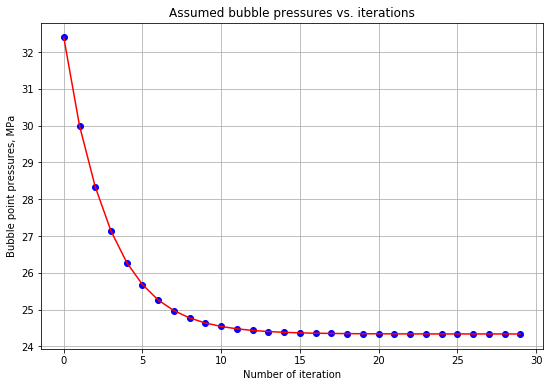

In [11]:
"""
Getting the number of iterations and
plotting the of correcring bubble pressure
versus iterations
"""

# The number of iterations
num_iter = len(bubble_list)
print('It took {} iterations to calculate appropriate bubble pressure'.format(num_iter))

# Plotting the trend
plt.figure(figsize = (9, 6))
plt.plot(bubble_list, 'bo')
plt.plot(bubble_list, 'r')
plt.xlabel('Number of iteration')
plt.ylabel('Bubble point pressures, MPa')
plt.title('Assumed bubble pressures vs. iterations')
plt.grid(True)
plt.show()

## Task 3. Describe why introduced error in the algorithm should theoretically converges to zero.

Let us take a look at the error evaluation.
$$ $$
$$
Error = \sum_{i}^{N} \left(1-\frac{f_{i}^{L}}{f_{i}^{V}} \right)^{2}
$$
$$ $$
If we are doing calculation right than we want the error to be as $\textbf{closer to zero}$ as possible. 

There are two parameters: $f_{i}^{L}$ is a fugacity of the component $i$ in liquid phase and $f_{i}^{V}$ is a fugacity of the component $i$ in vapour phase. And $N$ is a number of components in the mixture.

Let's refresh the state of the thermodynamic equilibrium: $\textbf{A zero net transfer}$ for all components inplies that hydrocarbon system is in the $\textbf{thermodynamic equilibrium}$. From the other hand, a zero net transfer is a result of $\textbf{equal fugacities}$ of a component in two phases. Mathematically it means that: 
$$ $$
$$ f_{i}^{L}=f_{i}^{V} $$
$$ $$
If the whole hydrocarbon system in the reservoir is in the bubble pressure so is means that the system is in the $\textbf{thermodynamic equilibrium}$. So we can introduce the algorithm as follows:
$$ $$
$$ f_{i}^{L} \sim f_{i}^{V} $$
$$ $$
$$ \frac{f_{i}^{L}}{f_{i}^{V}} \rightarrow 1 $$
$$ $$
$$ 1-\frac{f_{i}^{L}}{f_{i}^{V}} \rightarrow 0 $$
$$ $$
$$ \sum_{i}^{N} \left(1-\frac{f_{i}^{L}}{f_{i}^{V}} \right)^{2} \rightarrow 0 $$
$$ $$
$$ Error \rightarrow 0 $$

## Task 4. Fill the table below. Determine if the given mixture is Under saturated (U) or Saturated (S) oil reservoir.

In [12]:
"""
Initiazing the table that
I need to fill in
"""

# Create an initial datafame
df_matrix = np.zeros((4, 5), dtype='single')
columns = ['C1', 'nC10', 'Pb', 'U/S', 'U/S value']
df = pd.DataFrame(df_matrix,
                  columns = columns)

# Mixture composition
df['C1'] = [.5, .6, .7, .8]
df['nC10'] = [.5, .4, .3, .2]

print('The initial table that I need to fill')
df

The initial table that I need to fill


,C1,nC10,Pb,U/S,U/S value
0,0.5,0.5,0.0,0.0,0.0
1,0.6,0.4,0.0,0.0,0.0
2,0.7,0.3,0.0,0.0,0.0
3,0.8,0.2,0.0,0.0,0.0


In [13]:
"""
Initializing the function
that will create a sample
suitable for bubble point 
calculation
"""

def sample_creating(comp_C1, comp_nC10):
    
    zi = np.array([comp_C1, comp_nC10])
    Sample = pd.DataFrame(zi,
                          index = ['C1', 'nC10'],
                          columns = ['zi'])

    Sample['MW'] = np.array([16.043, 142.285])
    Sample['Tc'] = np.array([190.56, 617.7])
    Sample['Pc'] = np.array([4.599, 2.11])
    Sample['w'] = np.array([0.0115, 0.4923])
    Sample['x'] = Sample['zi']
    
    return Sample

In [14]:
"""
Initializing the function
that will fill in the table
"""

def saturation_calc(df, P_init, T_init, R, Kij, tolerance):
    
    # Calculate the number of examples
    num_examples = df.shape[0]
    
    for example in range(num_examples):
        
        # Extracting composition of components
        comp_C1, comp_nC10 = df['C1'][example], df['nC10'][example]
        
        # Generating a sample for bubble point calculation
        Sample = sample_creating(comp_C1, comp_nC10)
        
        # Calculating a bubble point pressure for a given composition
        df['Pb'][example] = bubble_point(Sample, P_init, T_init, R, Kij, tolerance)[0]
        
        # Calculating the saturation
        df['U/S value'][example] = format(P_init / df['Pb'][example], '.2f')
        
        
        # Oil reservoir is undersaturated if Pb / P_init >= 1
        # Oil reservoir is saturated if Pb / P_init < 1
        if df['U/S value'][example] >= 1:
            df['U/S'][example] = 'Undersaturated'
        else:
            df['U/S'][example] = 'Saturated'       
    
    return df   

In [15]:
"""
Calling a function
and calculate final dataframe
"""

print('The final table is the following')
df_final = saturation_calc(df, P_init, T_init, R, Kij, tolerance)
df_final

The final table is the following


,C1,nC10,Pb,U/S,U/S value
0,0.5,0.5,18.831768,Undersaturated,1.72
1,0.6,0.4,24.335091,Undersaturated,1.33
2,0.7,0.3,30.445292,Undersaturated,1.06
3,0.8,0.2,36.479748,Saturated,0.89


From the calculated table it can be easily observed that with $\textbf{increasing amount of methane}$ or light hydrocarbons the bubble point pressure of the oil reservoir $\textbf{increases}$. And if this bubble pressure of the certain reservoir is $\textbf{bigger}$ than the specific pressure then this oil reservoir is $\textbf{Saturated}$.

# Conclusions

* The bubble point was calculated for the certain conditions and given component composition, and for the temperature $T=377.6$ $\textit{K}$, pressure $P=32.4$ $\textit{MPa}$ and mixture of $C1$ and $nC10$ and $0.6-0.4$ composition distribution the bubble point pressure is $P_{b}=24.3$ $\textit{MPa}$.
$$ $$
* From the trend plot of corrected assuemd pressures versus iterations it can be observed that after some iterations the difference between certain and previous bubble point pressure converges to zero.
$$ $$
* If the oil reservoir's pressure is equal to bubble point pressure then it means that this reservoir is in the thermodynamic equilibrium and fugacities for one component in two phases are equal.
$$ $$
* With the increasing amount of light hydrocarbons the bubble point of the reservoir increases and it becomes more saturated. If the bubble point pressure is bigger than certain pressure in the reservoir than this oil reservoir is Saturated. But if the opposite then oil reservoir is Undersaturated.